In [ ]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
ts = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';') # по умолчанию разделитель - запятая

/tmp/ipython-input-2496905439.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  ts = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt", sep=';') # по умолчанию разделитель - запятая


In [ ]:
ts.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Global_active_power - общая активная мощность, потребляемая жилым домом (измеряется в киловаттах) (то, что реально потребляется приборами).

Global_reactive_power - общая реактивная мощность, потребляемая жилым домом (измеряется в киловаттах) (то, что циркулирует между источником и нагрузкой, но не выполняет полезной работы (например, в индуктивных приборах: электродвигателях, трансформаторах, индукционных плитах, ...)).

Voltage - среднее напряжение (измеряется в вольтах).

Global_intensity - среднее значение силы тока, текущей через электрическую систему дома(измеряется в амперах).

Sub_metering_1 - активная энергия потребления кухонной комнаты (измеряется в ватт-часах активной энергии).

Sub_metering_2 - активная энергия потребления прачечной (стиральная машина, холодильник, осушитель) (измеряется в ватт-часах активной энергии).

Sub_metering_3 - активная энергия потребления систем климат-контроля (бойлер, кондиционер) (измеряется в ватт-часах активной энергии).

In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
# Агрегируем столбцы Date и Time в один и приводим к формату datetime
ts['DateTime'] = pd.to_datetime(ts['Date'] + " " + ts['Time'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
# Пока на всякий случай оставлем дату и время как отдельные колонки
ts['Date'] = pd.to_datetime(ts['Date'], format='%d/%m/%Y')
ts['Time'] = pd.to_datetime(ts['Time'], format='%H:%M:%S')

In [ ]:
# Добавляем столбец Weekday и изменяем порядок колонок для собственного удобства
ts['Weekday'] = ts['DateTime'].dt.day_name()
ts = ts[['Weekday'] + [col for col in ts.columns if col != 'Weekday']]
ts = ts[['DateTime'] + [col for col in ts.columns if col != 'DateTime']]

In [ ]:
ts.head()

,DateTime,Weekday,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,Saturday,2006-12-16,1900-01-01 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,Saturday,2006-12-16,1900-01-01 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,Saturday,2006-12-16,1900-01-01 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,Saturday,2006-12-16,1900-01-01 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,Saturday,2006-12-16,1900-01-01 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# На всякий случай сортируем в хронологическом порядке
ts = ts.sort_values('DateTime')

In [ ]:
# Заменим строковые значения "?" на NaN, чтобы работать со значениями типа float
ts = ts.replace('?', pd.NA)

In [ ]:
ts.isnull().sum()

,0
DateTime,0
Weekday,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979


In [ ]:
# Смотрим, в какие дни недели чаще отсутствуют показания
mask = ts.isna().any(axis=1) # True там, где есть хотя бы один NaN
ts_missing = ts[mask]
ts_missing['Weekday'].value_counts()

,count
Weekday,
Saturday,6773
Sunday,6611
Thursday,3482
Wednesday,2981
Monday,2772
Tuesday,1910
Friday,1450


Судя по одинаковому количеству пропусков и нескольким строкам с пропусками, которые визуально удалось просмотреть, в какие-то определённые моменты времени все показания отсутствуют (не один какой-то, а все).

Больше всего пропусков - в выходные (в субботу больше, чем в воскресенье). Это может быть связано с тем, что в выходные жильцы могли уезжать, отключать приборы или даже систему мониторинга.

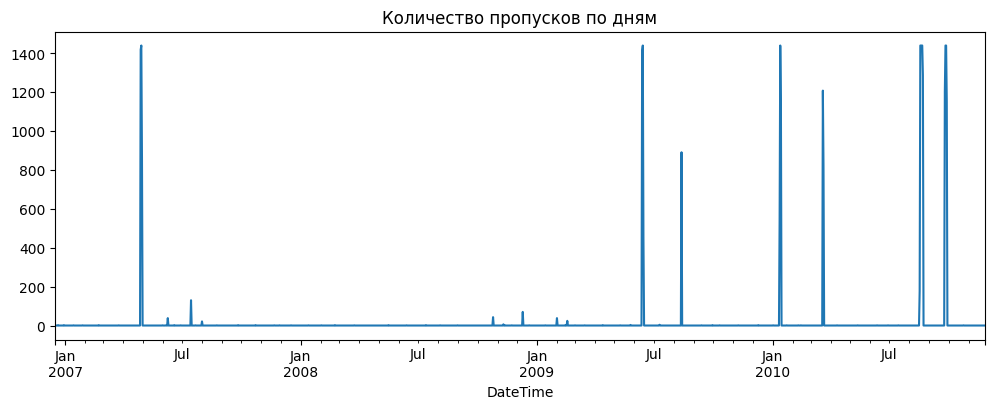

In [ ]:
# Визуализируем пропуски
import matplotlib.pyplot as plt

ts['Is_missing'] = ts.isna().any(axis=1)
ts.set_index('DateTime')['Is_missing'].astype(int).resample('D').sum().plot(figsize=(12,4))
plt.title("Количество пропусков по дням")
plt.show()

In [ ]:
# Считаем количество строк по дням
counts_per_day = ts.set_index('DateTime').resample('D').size()

# Находим максимальное значение
max_count = counts_per_day.max()

print("Максимальное число записей в одном дне:", max_count)

Максимальное число записей в одном дне: 1440


In [ ]:
# Находим самое часто встречающееся количество строк
most_common_count = counts_per_day.mode()[0]

print("Самое часто встречающееся количество строк за день:", most_common_count)

Самое часто встречающееся количество строк за день: 1440


In [ ]:
missing_per_day = ts.set_index('DateTime')['Is_missing'].astype(int).resample('D').sum()
days_with_1440 = (missing_per_day == 1440).sum()
print("Количество дней с 1440 пропусками:", days_with_1440)

Количество дней с 1440 пропусками: 9


У нас есть 9 дней, которые полностью выпали (в датасете нет показателей за эти дни, пропуски).

In [ ]:
# Берём только дни, где пропусков ровно 1440
days_with_1440 = missing_per_day[missing_per_day == 1440].index

# Фильтруем исходный DataFrame по этим датам
result = ts[ts['Date'].dt.normalize().isin(days_with_1440)][['Date', 'Weekday']]

# Оставляем уникальные комбинации (дата + день недели)
result_unique = result.drop_duplicates()

result_unique

,Date,Weekday
191916,2007-04-29,Sunday
1310796,2009-06-14,Sunday
1617516,2010-01-13,Wednesday
1929996,2010-08-18,Wednesday
1931436,2010-08-19,Thursday
1932876,2010-08-20,Friday
1934316,2010-08-21,Saturday
1986156,2010-09-26,Sunday
1987596,2010-09-27,Monday


Итого полностью пропущены дни:
 29 апреля (вс),
 14 июня (вс),
 13 января (ср),
 4 последовательных дня с 18 августа по 21-ое (ср-сб),
 2 последовательных дня 26-ое и 27-ое сентября (вс и пн).
 Вроде это не красные дни календаря во Франции, где собирались данные для датасета.
 Скорее всего, в эти дни жильцы были не дома либо производилось обслуживание мониторингового оборудования.

Теперь необходимо заполнить пропуски. Как видим из графика, какой-то чёткой сезонной закономерности у пропусков нет, поэтому мне кажется целесообразным заполнить недостающие значения значениями в этот же день, но за предыдущий или следующий год.

In [ ]:
# Определяем числовые столбцы
numeric_cols = ts.columns.drop(['DateTime', 'Date', 'Time', 'Weekday', 'Is_missing'])

# Преобразуем все числовые колонки в float, заменяя ошибки на NaN
ts[numeric_cols] = ts[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Функция для поиска значения в тот же день год назад/вперёд
def fill_with_shift(row, df, shift_years=[-1, 1]):
    if not row.isna().any():
        return row

    dt = row['DateTime']
    for shift in shift_years:
        candidate_date = dt.replace(year=dt.year + shift)
        candidate = df[df['DateTime'] == candidate_date]
        if not candidate.empty:
            # Берём первую найденную строку
            return candidate.iloc[0]
    return row

# Применяем построчно
ts_filled = ts.apply(lambda row: fill_with_shift(row, ts), axis=1)

In [ ]:
rows_with_na = ts_filled[ts_filled.isna().any(axis=1)]
rows_with_na

,DateTime,Weekday,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Is_missing
1310488,2008-06-13 18:52:00,Friday,2008-06-13,1900-01-01 18:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
ts_filled = ts_filled.fillna(ts_filled.median(numeric_only=True))

In [ ]:
ts_filled.isnull().sum()

,0
DateTime,0
Weekday,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0


/tmp/ipython-input-3737437576.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = ts_filled.set_index('DateTime')['Global_active_power'].resample('M').mean()


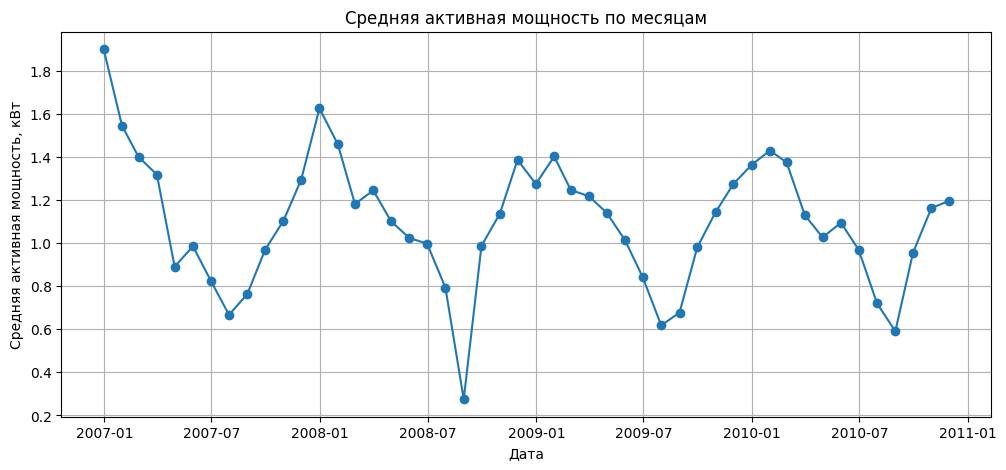

In [ ]:
# Среднее значение Global_active_power по месяцам
monthly_mean = ts_filled.set_index('DateTime')['Global_active_power'].resample('M').mean()

# Строим график
plt.figure(figsize=(12,5))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o', linestyle='-')
plt.title('Средняя активная мощность по месяцам')
plt.xlabel('Дата')
plt.ylabel('Средняя активная мощность, кВт')
plt.grid(True)
plt.show()


Тест Дики-Фуллера, чтобы узнать, является ли ряд стационарным.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Проведем тест Дики-Фуллера на стационарность (данные усредним по месяцам)
monthly_series = ts_filled.set_index('DateTime')['Global_active_power'].resample('M').mean()

result = adfuller(monthly_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

/tmp/ipython-input-100089853.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_series = ts_filled.set_index('DateTime')['Global_active_power'].resample('M').mean()


ADF Statistic: -4.860796
p-value: 0.000042
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


**Нулевая гипотеза ADF**: ряд имеет единичный корень (нестационарен).

**Альтернативная гипотеза**: ряд стационарен.

Так как **ADF Statistics (-4,86) < Critical Value** и **p-value < 0.05**, то мы опровергаем нулевую гипотезу и принимаем альтернативную, то есть наш ряд (среднее по месяцам для Global_active_power) - **стационарен**.

In [ ]:
ts_filled.describe()

,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-03 02:48:37.357694976,2008-12-02 14:49:04.612889856,1900-01-01 11:59:32.744808704,1.089602e+00,1.241207e-01,2.408481e+02,4.619540e+00,1.120716e+00,1.296894e+00,6.456651e+00
min,2006-12-16 17:24:00,2006-12-16 00:00:00,1900-01-01 00:00:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-14 15:37:30,2007-12-14 00:00:00,1900-01-01 06:00:00,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-03 06:44:00,2008-12-03 00:00:00,1900-01-01 12:00:00,6.000000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-11-19 08:16:30,2009-11-19 00:00:00,1900-01-01 18:00:00,1.526000e+00,1.940000e-01,2.428800e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,2010-11-26 00:00:00,1900-01-01 23:59:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,NaN,NaN,1.055763e+00,1.130093e-01,3.233464e+00,4.437668e+00,6.149570e+00,5.813304e+00,8.435644e+00


In [ ]:
import numpy as np

In [ ]:
# Проведем тест Дики-Фуллера на стационарность (данные усредним по дням)
daily_series = ts_filled.set_index('DateTime')['Global_active_power'].resample('D').mean()

# Убираем NaN и бесконечные значения
daily_series = daily_series.replace([np.inf, -np.inf], np.nan).dropna()

result = adfuller(daily_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.685490
p-value: 0.004322
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Ряд, усреднённый по дням, тоже стационарен по Дики-Фуллеру.

In [ ]:
# Берём первый год (2007)
one_year = ts_filled[(ts_filled['DateTime'] >= '2007-01-01') &
                     (ts_filled['DateTime'] < '2008-01-01')]

# Берём минутные значения Global_active_power
minute_series = one_year['Global_active_power']

# Убираем NaN и бесконечные значения
minute_series = minute_series.replace([np.inf, -np.inf], np.nan).dropna()

# Запускаем тест Дики–Фуллера
result = adfuller(minute_series)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

Объёма ОЗУ не хватает даже на один год поминутных показаний.

<Figure size 1200x800 with 0 Axes>

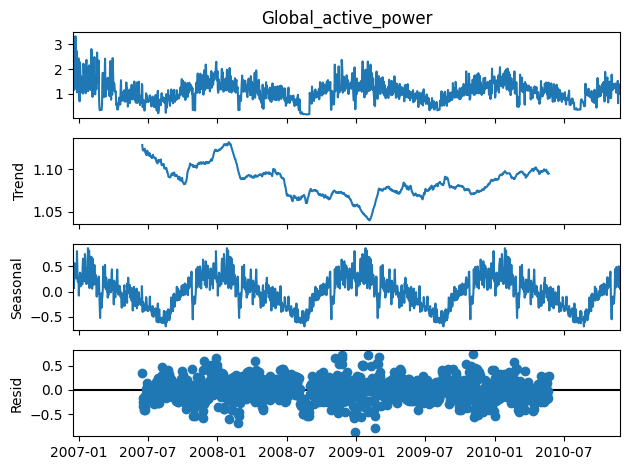

In [ ]:
# Визуализация данных, усреднённых по дням
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция: additive модель, период = 365 (годовая сезонность)
decomposition = seasonal_decompose(daily_series, model='additive', period=365)

# Визуализация
plt.figure(figsize=(12,8))
decomposition.plot()
plt.show()

**Проанализируем полученные данные:**

**1-ый график** - это дневные значения Global_active_power с 2007 по 2010 год. Видим регулярные колебания. В зимние месяцы - пики (потребление выше), в летние месяцы - спады.

**2-ой график** - это тренд. До 2009 года идёт снижение, после 2009 снова рост. Тяжело предположить, с чем это связано. Экономия? Замена приборов?

**3-ий график** - это сезонность. Здесь просматриваются чёткие повторяющиеся колебания (годовая сезонность). Циклы регулярные. Зимой потребление выше, летом - минимальное.

**4-ый график** - остаток (шум). Нет никаких выбросов, аномалий. Все значения близки к нулю.

<Figure size 1200x800 with 0 Axes>

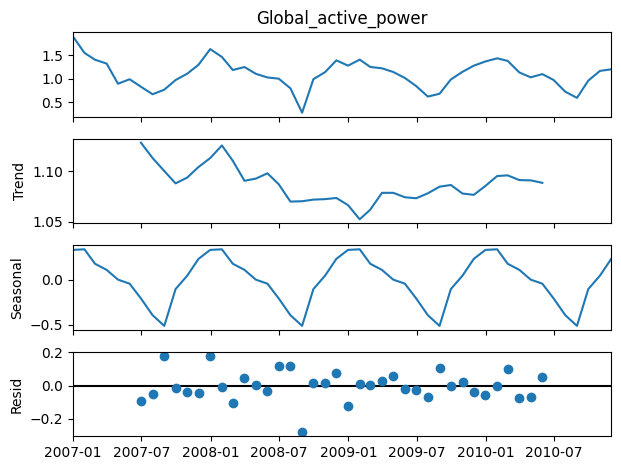

In [ ]:
# Картина для данных, усреднённых по месяцам
# Декомпозиция: additive модель, период = 12 (годовая сезонность)
decomposition = seasonal_decompose(monthly_series, model='additive', period=12)

# Визуализация
plt.figure(figsize=(12,8))
decomposition.plot()
plt.show()

У стационарного ряда тренда нет (так как среднее не меняется со временем), нет сезонности (или она удалена), постоянная дисперсия, автокорреляция не зависит от времени.

Несмотря на результаты теста Дики-Фуллера, что-то похожее на тренд есть. Сезонность уж точно имеется. Проверим на всякий случай стационарность ряда ещё KPSS-тестом.

In [ ]:
from statsmodels.tsa.stattools import kpss

stat, p_value, _, crit = kpss(daily_series.dropna(), regression='c')
print(f'KPSS Statistic: {stat}')
print(f'p-value: {p_value}')
print('Critical Values:', crit)

KPSS Statistic: 0.20804519938701255
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/tmp/ipython-input-205620692.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, _, crit = kpss(daily_series.dropna(), regression='c')


**KPSS-тест:**

**H0**: ряд стационарен.
**H1**: ряд нестационарен.

В нашем случае: **p-value = 0.1 > 0.05** -> ряд стационарен.

**KPSS Statistic** меньше самого низкого порога, что ещё раз подтверждает стационарность.

Таким образом, ряд стационарен и по тесту Дики-Фуллера, и по тесту KPSS.

Наличие сезонности может говорить о том, что ряд сезонно-стационарен (среднее и дисперсия постоянны, но есть регулярные циклы).
При прогнозировании сезонность рекомендуют удалять (сезонное дифференцирование).

In [ ]:
# Убедимся, что индекс — это DateTime
ts_filled = ts_filled.sort_index()

df = ts_filled[['Global_active_power']].copy()

# Календарные признаки
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour

# Лаги и скользящие окна
df['lag1'] = df['Global_active_power'].shift(1)
df['lag7'] = df['Global_active_power'].shift(7)
df['lag30'] = df['Global_active_power'].shift(30)
df['rolling_mean_7'] = df['Global_active_power'].rolling(7).mean()
df['rolling_std_7'] = df['Global_active_power'].rolling(7).std()

df = df.dropna()

# Определяем последний и предпоследний месяц
last_month = ts_filled.index.max().to_period('M')
prev_month = (ts_filled.index.max() - pd.offsets.MonthBegin(1)).to_period('M')

# Формируем выборки
train = df[df.index.to_period('M') < prev_month]
val   = df[df.index.to_period('M') == prev_month]
test  = df[df.index.to_period('M') == last_month]


X_train, y_train = train.drop(columns=['Global_active_power']), train['Global_active_power']
X_val, y_val     = val.drop(columns=['Global_active_power']), val['Global_active_power']
X_test, y_test   = test.drop(columns=['Global_active_power']), test['Global_active_power']

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
from lightgbm import early_stopping, log_evaluation

In [ ]:
# 3. Обучение модели GBM
model = LGBMRegressor(
    objective='regression',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1000
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(0)]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1357
[LightGBM] [Info] Number of data points in the train set: 2037966, number of used features: 10
[LightGBM] [Info] Start training from score 1.087594
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.191317	valid_0's l2: 0.0366021


LGBMRegressor(learning_rate=0.05, n_estimators=1000, objective='regression')

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# 4. Прогноз и оценка на тесте
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
# MAPE (в процентах)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# R²
r2 = r2_score(y_test, y_pred)

print("MSE на тесте:", mse)
print("RMSE на тесте:", rmse)
print("MAE на тесте:", mae)
print("MAPE на тесте (%):", mape) # в среднем модель ошибается на ..%
print("R² на тесте:", r2) # доля дисперсии, которую объясняет модель

MSE на тесте: 0.036602108166949865
RMSE на тесте: 0.1913167744003381
MAE на тесте: 0.06941868727534199
MAPE на тесте (%): 5.6826251349703325
R² на тесте: 0.962643372441898


Среднее значение ряда - 1,09.

RMSE - 0,19 (17,43 % от среднего уровня ряда).

MSE достаточно низкая, модель стабильна, но квадрат единиц не очень нагляден.

MAE: модель в среднем ошибается на 0,07 кВт, что, как мне кажется, неплохо относительно масштаба ряда.

MAPE ~6% - в среднем модель ошибается на менее, чем 6%.

R^2: 0.963 -> объясняет более 96% вариации данных. Высокий показатель.

В целом модель улавливает структуру ряда и даёт разумные прогнозы, но ещё можно улучшаться.